# Activity: Hypothesis testing with Python<a href="#Activity:-Hypothesis-testing-with-Python"
class="anchor-link">¶</a>

## **Introduction**<a href="#Introduction" class="anchor-link">¶</a>

As you've been learning, analysis of variance (commonly called ANOVA) is
a group of statistical techniques that test the difference of means
among three or more groups. It's a powerful tool for determining whether
population means are different across groups and for answering a wide
range of business questions.

In this activity, you are a data professional working with historical
marketing promotion data. You will use the data to run a one-way ANOVA
and a post hoc ANOVA test. Then, you will communicate your results to
stakeholders. These experiences will help you make more confident
recommendations in a professional setting.

In your dataset, each row corresponds to an independent marketing
promotion, where your business uses TV, social media, radio, and
influencer promotions to increase sales. You have previously provided
insights about how different promotion types affect sales; now
stakeholders want to know if sales are significantly different among
various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to
determine if there is a statistically significant difference in sales
among groups. This includes:

-   Using plots and descriptive statistics to select a categorical
    independent variable
-   Creating and fitting a linear regression model with the selected
    categorical independent variable
-   Checking model assumptions
-   Performing and interpreting a one-way ANOVA test
-   Comparing pairs of groups using an ANOVA post hoc test
-   Interpreting model outputs and communicating the results to
    nontechnical stakeholders

## **Step 1: Imports**<a href="#Step-1:-Imports" class="anchor-link">¶</a>

Import pandas, pyplot from matplotlib, seaborn, api from statsmodels,
ols from statsmodels.formula.api, and pairwise_tukeyhsd from
statsmodels.stats.multicomp.

In \[1\]:

    # Import libraries and packages.
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as
`data`, now display the first five rows. The variables in the dataset
have been adjusted to suit the objectives of this lab. As shown in this
cell, the dataset has been automatically loaded in for you. You do not
need to download the .csv file, or provide more code, in order to access
the dataset and proceed with this lab. Please continue with this
activity by completing the following instructions.

In \[2\]:

    # RUN THIS CELL TO IMPORT YOUR DATA.

    ### YOUR CODE HERE ### 
    data = pd.read_csv('marketing_sales_data.csv')

    # Display the first five rows.
    data.head(5)

Out\[2\]:

|     | TV     | Radio     | Social Media | Influencer | Sales      |
|-----|--------|-----------|--------------|------------|------------|
| 0   | Low    | 1.218354  | 1.270444     | Micro      | 90.054222  |
| 1   | Medium | 14.949791 | 0.274451     | Macro      | 222.741668 |
| 2   | Low    | 10.377258 | 0.061984     | Mega       | 102.774790 |
| 3   | High   | 26.469274 | 7.070945     | Micro      | 328.239378 |
| 4   | High   | 36.876302 | 7.618605     | Mega       | 351.807328 |

The features in the data are:

-   TV promotion budget (in Low, Medium, and High categories)
-   Social media promotion budget (in millions of dollars)
-   Radio promotion budget (in millions of dollars)
-   Sales (in millions of dollars)
-   Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis
before constructing a linear regression model?

-   TV promotion budget (in Low, Medium, and High categories)
-   Social media promotion budget(in millions of dollars)
-   Radio promotions budget (in millions of dollars)
-   Sales (in millions of dollars)
-   Influencer size (in Mega, Macro, Nano, and Micro categories)

## **Step 2: Data exploration**<a href="#Step-2:-Data-exploration" class="anchor-link">¶</a>

First, use a boxplot to determine how `Sales` vary based on the `TV`
promotion budget category.

In \[3\]:

    # Create a boxplot with TV and Sales.
    sns.boxplot(x = 'TV', y = 'Sales', data = data);

![](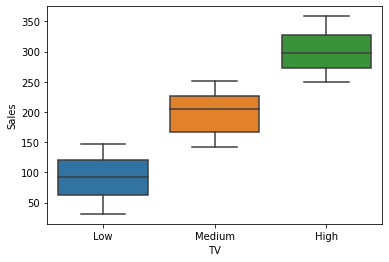%0A)

**Question:** Is there variation in `Sales` based off the `TV` promotion
budget?

There is considerable variation in Sales across the TV groups, the
significance of these differences can be tested with a one-way ANOVA.

Now, use a boxplot to determine how `Sales` vary based on the
`Influencer` size category.

In \[5\]:

    # Create a boxplot with Influencer and Sales.
    sns.boxplot(x = 'Influencer', y = 'Sales', data = data);

![](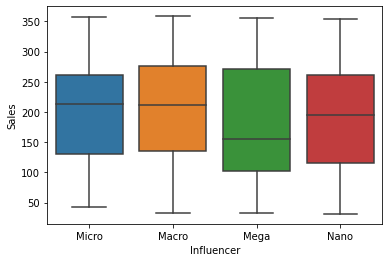%0A)

**Question:** Is there variation in `Sales` based off the `Influencer`
size?

There is some variation in Sales across the Influencer groups, but it
may not be significant.

### Remove missing data<a href="#Remove-missing-data" class="anchor-link">¶</a>

You may recall from prior labs that this dataset contains rows with
missing values. To correct this, drop these rows. Then, confirm the data
contains no missing values.

In \[6\]:

    # Drop rows that contain missing data and update the DataFrame.
    data = data.dropna(axis=0)

    # Confirm the data contains no missing values.
    data.isnull().sum()

Out\[6\]:

    TV              0
    Radio           0
    Social Media    0
    Influencer      0
    Sales           0
    dtype: int64

## **Step 3: Model building**<a href="#Step-3:-Model-building" class="anchor-link">¶</a>

Fit a linear regression model that predicts `Sales` using one of the
independent categorical variables in `data`. Refer to your previous code
for defining and fitting a linear regression model.

In \[7\]:

    # Define the OLS formula.
    ols_formula = 'Sales ~ C(TV)'

    # Create an OLS model.
    OLS = ols(formula = ols_formula, data = data)

    # Fit the model.
    model = OLS.fit()

    # Save the results summary.
    model_results = model.summary()

    # Display the model results.
    model_results

Out\[7\]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | Sales            | R-squared:          | 0.874     |
| Model:            | OLS              | Adj. R-squared:     | 0.874     |
| Method:           | Least Squares    | F-statistic:        | 1971\.    |
| Date:             | Fri, 14 Mar 2025 | Prob (F-statistic): | 8.81e-256 |
| Time:             | 12:38:15         | Log-Likelihood:     | -2778.9   |
| No. Observations: | 569              | AIC:                | 5564\.    |
| Df Residuals:     | 566              | BIC:                | 5577\.    |
| Df Model:         | 2                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                   |           |         |         |          |          |          |
|-------------------|-----------|---------|---------|----------|----------|----------|
|                   | coef      | std err | t       | P\>\|t\| | \[0.025  | 0.975\]  |
| Intercept         | 300.5296  | 2.417   | 124.360 | 0.000    | 295.783  | 305.276  |
| C(TV)\[T.Low\]    | -208.8133 | 3.329   | -62.720 | 0.000    | -215.353 | -202.274 |
| C(TV)\[T.Medium\] | -101.5061 | 3.325   | -30.526 | 0.000    | -108.038 | -94.975  |

|                |         |                   |          |
|----------------|---------|-------------------|----------|
| Omnibus:       | 450.714 | Durbin-Watson:    | 2.002    |
| Prob(Omnibus): | 0.000   | Jarque-Bera (JB): | 35.763   |
| Skew:          | -0.044  | Prob(JB):         | 1.71e-08 |
| Kurtosis:      | 1.775   | Cond. No.         | 3.86     |

  
  
Warnings:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

**Question:** Which categorical variable did you choose for the model?
Why?

-   TV was selected as the preceding analysis showed a strong
    relationship between the TV promotion budget and the average Sales.
-   Influencer was not selected because it did not show a strong
    relationship to Sales in the analysis.

### Check model assumptions<a href="#Check-model-assumptions" class="anchor-link">¶</a>

Now, check the four linear regression assumptions are upheld for your
model.

**Question:** Is the linearity assumption met?

Because the model does not have any continous independent variables, the
linearity assumption is not required.

The independent observation assumption states that each observation in
the dataset is independent. As each marketing promotion (row) is
independent from one another, the independence assumption is not
violated.

Next, verify that the normality assumption is upheld for the model.

In \[8\]:

    # Calculate the residuals.
    residuals = model.resid

    # Create a histogram with the residuals. 
    fig, axes = plt.subplots(1, 2, figsize = (8, 5))
    sns.histplot(residuals, ax=axes[0])

    axes[0].set_xlabel("Residuals Value")
    axes[0].set_title("Histogram of Residuals")

    # Create a QQ plot of the residuals.
    sm.qqplot(residuals, line='s', ax=axes[1])
    axes[1].set_title("Normal QQ plot")

    plt.tight_layout()
    plt.show()

![](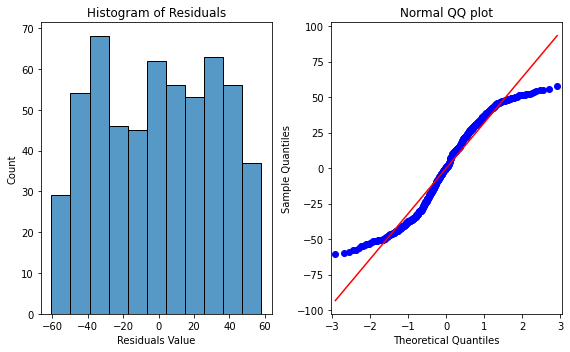%0A)

**Question:** Is the normality assumption met?

There is reasonable concern that the normality assumption is not met
when TV is used as the independent variable predicting Sales. The normal
q-q forms an 'S' that deviates off the red diagonal line, which is not
desired behavior.

Now, verify the constant variance (homoscedasticity) assumption is met
for this model.

In \[9\]:

    # Create a scatter plot with the fitted values from the model and the residuals.
    fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

    fig.set_xlabel("Fitted Values")
    fig.set_ylabel("Residuals")
    fig.set_title("Fitted Values vs Residuals")

    # Add a line at y = 0 to visualize the variance of residuals above and below 0.
    fig.axhline(0)
    plt.show()

![](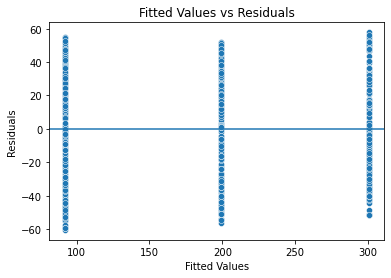%0A)

**Question:** Is the constant variance (homoscedasticity) assumption
met?

The variance where there are fitted values is similarly distributed,
validating that the constant variance assumption is met.

## **Step 4: Results and evaluation**<a href="#Step-4:-Results-and-evaluation" class="anchor-link">¶</a>

First, display the OLS regression results.

In \[10\]:

    # Display the model results summary.
    model_results

Out\[10\]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | Sales            | R-squared:          | 0.874     |
| Model:            | OLS              | Adj. R-squared:     | 0.874     |
| Method:           | Least Squares    | F-statistic:        | 1971\.    |
| Date:             | Fri, 14 Mar 2025 | Prob (F-statistic): | 8.81e-256 |
| Time:             | 12:38:15         | Log-Likelihood:     | -2778.9   |
| No. Observations: | 569              | AIC:                | 5564\.    |
| Df Residuals:     | 566              | BIC:                | 5577\.    |
| Df Model:         | 2                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                   |           |         |         |          |          |          |
|-------------------|-----------|---------|---------|----------|----------|----------|
|                   | coef      | std err | t       | P\>\|t\| | \[0.025  | 0.975\]  |
| Intercept         | 300.5296  | 2.417   | 124.360 | 0.000    | 295.783  | 305.276  |
| C(TV)\[T.Low\]    | -208.8133 | 3.329   | -62.720 | 0.000    | -215.353 | -202.274 |
| C(TV)\[T.Medium\] | -101.5061 | 3.325   | -30.526 | 0.000    | -108.038 | -94.975  |

|                |         |                   |          |
|----------------|---------|-------------------|----------|
| Omnibus:       | 450.714 | Durbin-Watson:    | 2.002    |
| Prob(Omnibus): | 0.000   | Jarque-Bera (JB): | 35.763   |
| Skew:          | -0.044  | Prob(JB):         | 1.71e-08 |
| Kurtosis:      | 1.775   | Cond. No.         | 3.86     |

  
  
Warnings:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

**Question:** What is your interpretation of the model's R-squared?

Using TV as the independent variable results in a linear regression
model with \$R^{2} = 0.874\$. In other words, the model explains
\$87.4\\%\$ of the variation in Sales. This makes the model an effective
predictor of Sales.

**Question:** What is your intepretation of the coefficient estimates?
Are the coefficients statistically significant?

The default TV category for the model is High, because there are
coefficients for the other two TV categories, Medium and Low. According
to the model, Sales with a Medium or Low TV category are lower on
average than Sales with a High TV category. For example, the model
predicts that a Low TV promotion would be 208.813 (in millions of
dollars) lower in Sales on average than a High TV promotion.

The p-value for all coefficients is \$0.000\$, meaning all coefficients
are statistically significant at \$p=0.05\$. The 95% confidence
intervals for each coefficient should be reported when presenting
results to stakeholders. For instance, there is a \$95\\%\$ chance the
interval \$\[-215.353,-202.274\]\$ contains the true parameter of the
slope of \$\beta\_{TVLow}\$, which is the estimated difference in
promotion sales when a Low TV promotion is chosen instead of a High TV
promotion.

**Question:** Do you think your model could be improved? Why or why not?
How?

Given how accurate TV was as a predictor, the model could be improved
with a more granular view of the TV promotions, such as additional
categories or the actual TV promotion budgets. Additional variables,
such as the location of the marketing campaign or the time of year, may
increase model accuracy.

### Perform a one-way ANOVA test<a href="#Perform-a-one-way-ANOVA-test" class="anchor-link">¶</a>

With the model fit, run a one-way ANOVA test to determine whether there
is a statistically significant difference in `Sales` among groups.

In \[11\]:

    # Create an one-way ANOVA table for the fit model.
    sm.stats.anova_lm(model, typ=2)

Out\[11\]:

|          | sum_sq       | df    | F           | PR(\>F)       |
|----------|--------------|-------|-------------|---------------|
| C(TV)    | 4.052692e+06 | 2.0   | 1971.455737 | 8.805550e-256 |
| Residual | 5.817589e+05 | 566.0 | NaN         | NaN           |

**Question:** What are the null and alternative hypotheses for the ANOVA
test?

-   The null hypothesis is that there is no difference in Sales based on
    the TV promotion budget.
-   The alternative hypothesis is that there is a difference is Sales
    based on the TV promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

The F-test statistic is 1971.46 and the p-value is \$8.81 \* 10^{-256}\$
(i.e., very small). Because the p-value is less than 0.05, you would
reject the null hypothesis that there is no difference in Sales based on
the TV promotion budget.

**Question:** What did the ANOVA test tell you?

The results of the one-way ANOVA test indicate that you can reject the
null hypothesis in favor of the alternative hypothesis. There is a
statistically significant differnece in Sales amoung TV groups.

### Perform an ANOVA post hoc test<a href="#Perform-an-ANOVA-post-hoc-test" class="anchor-link">¶</a>

If you have significant results from the one-way ANOVA test, you can
apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant
difference between each pair of categories for TV.

In \[12\]:

    # Perform the Tukey's HSD post hoc test.
    tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'])
    tukey_oneway.summary()

Out\[12\]:

| group1 | group2 | meandiff  | p-adj | lower     | upper     | reject |
|--------|--------|-----------|-------|-----------|-----------|--------|
| High   | Low    | -208.8133 | 0.001 | -216.637  | -200.9896 | True   |
| High   | Medium | -101.5061 | 0.001 | -109.3204 | -93.6918  | True   |
| Low    | Medium | 107.3072  | 0.001 | 99.7063   | 114.908   | True   |

Multiple Comparison of Means - Tukey HSD, FWER=0.05

**Question:** What is your interpretation of the Tukey HSD test?

-   The first row, which compares the High and Low TV groups, indicates
    that you can reject the null hypotheis that there is no significant
    difference between the Sales of these two groups.

-   You can also reject the null hypotheses for the two other pairwise
    comparisons that compare High to Medium and Low to Medium.

**Question:** What did the post hoc tell you?\*\*

A post hoc test was conducted to determine which TV groups are differnet
and how many are different from each other. This provides more detail
than the one-way ANOVA results, which can at most determine that at
least one group is different. Further, using the Tukey HSD controls for
the increasing probabilty of incorrectly rejecting a null hypothesis
from performing multiple tests.

The results were that Sales is not the same between any pair of TV
groups.

## **Considerations**<a href="#Considerations" class="anchor-link">¶</a>

**What are some key takeaways that you learned during this lab?**

-   Box-plots are a helpful tool for visualizing the distribution of a
    variable across groups.
-   One-way ANOVA can be used to determine if there are significant
    differences amoung the means of three or more groups.
-   ANOVA post hoc tests provide a more detailed view of the pairwise
    differences between groups.

**What summary would you provide to stakeholders? Consider the
statistical significance of key relationships and differences in
distribution.**

-   The analysis confirms that higher TV promotion budgets lead to
    significantly higher sales compared to both medium and low budgets.
    Additionally, medium TV promotion budgets outperform low budgets in
    terms of sales impact.

-   High vs. Low TV promotions: Sales increase by an estimated \$208.81
    million (95% CI: \$200.99M – \$216.64M).

-   High vs. Medium TV promotions: Sales increase by an estimated
    \$101.51 million (95% CI: \$93.69M – \$109.32M).

-   Medium vs. Low TV promotions: Sales increase by an estimated
    \$107.31 million (95% CI: \$99.71M – \$114.91M).

-   The linear regression model predicting Sales from TV promotion
    budgets showed a strong fit with an R-squared of 0.871, confirming
    its reliability as a predictor. The relationship between TV
    promotion budgets and sales was statistically significant.

-   Results from the one-way ANOVA test support rejecting the null
    hypothesis, indicating that TV promotion budgets significantly
    impact sales.

-   The ANOVA post hoc test further confirms that all TV budget
    level(high, medium, low) show statistically significant differneces
    in sales.

-   The one-way ANOVA and Tukey's HSD test reinforce that TV promotion
    budgets plays a crucial role in driving sales growth.

#### **Reference**<a href="#Reference" class="anchor-link">¶</a>

[Saragih, H.S. *Dummy Marketing and Sales
Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not
notice a green check mark next to this item on Coursera's platform.
Please continue your progress regardless of the check mark. Just click
on the "save" icon at the top of this notebook to ensure your work has
been logged.